In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train_data = pd.read_csv("D:/Github/Bakery_sales_prediction_2025/bakery-sales-prediction-summer-2025-Dataset/train.csv")
train_data = train_data.rename(columns={
    "id": "ID",
    "Datum": "Date",
    "Warengruppe": "Product_Category",
    "Umsatz": "Sales_EUR"
})

weather_data = pd.read_csv("D:/Github/Bakery_sales_prediction_2025/bakery-sales-prediction-summer-2025-Dataset/wetter.csv")

weather_data = weather_data.rename(columns={
    "Datum": "Date",
    "Bewoelkung": "Cloud_Coverage",
    "Temperatur": "Temperature_C",
    "Windgeschwindigkeit": "Wind_Speed_mps",
    "Wettercode": "Weather_Code"
})


C:\Users\ASUS\AppData\Local\Temp\ipykernel_12968\3154172066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Sales_EUR', data=train_data,palette='viridis')


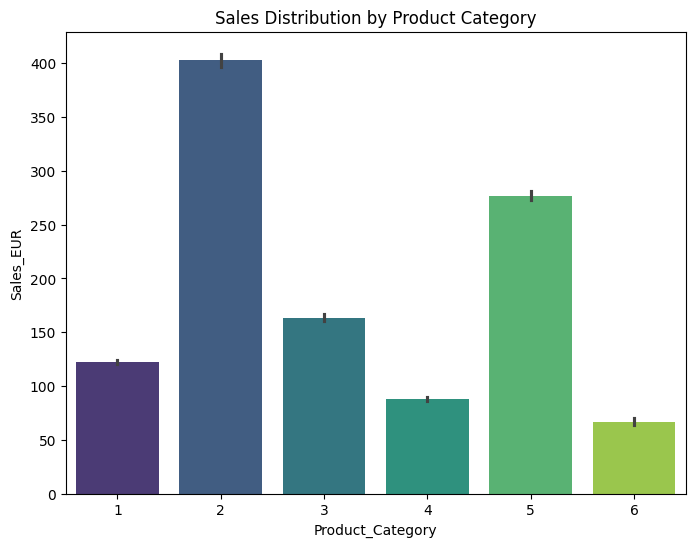

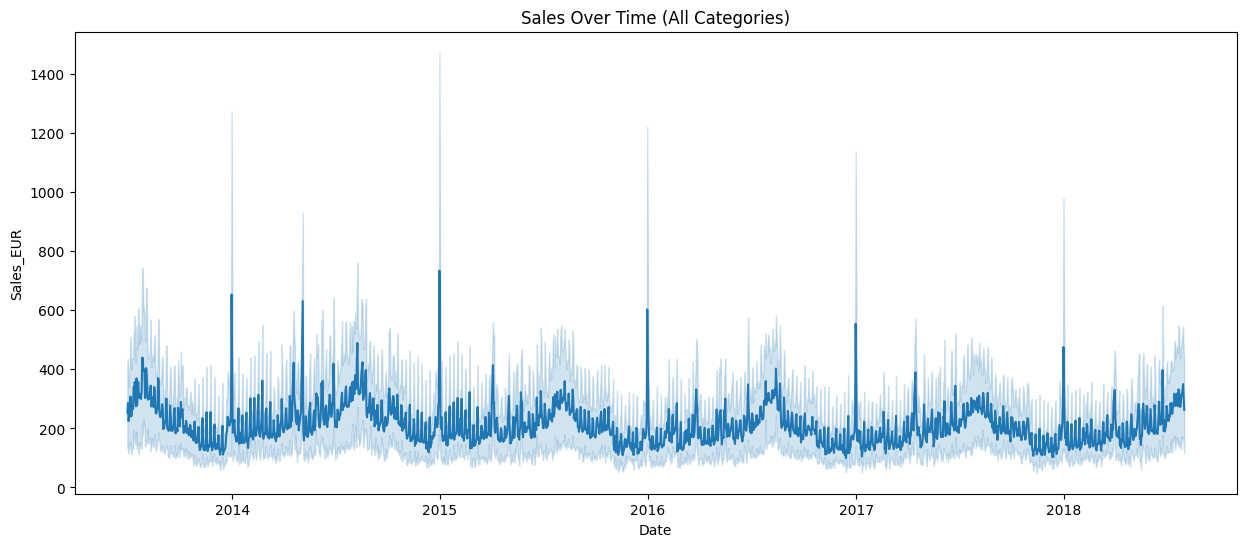

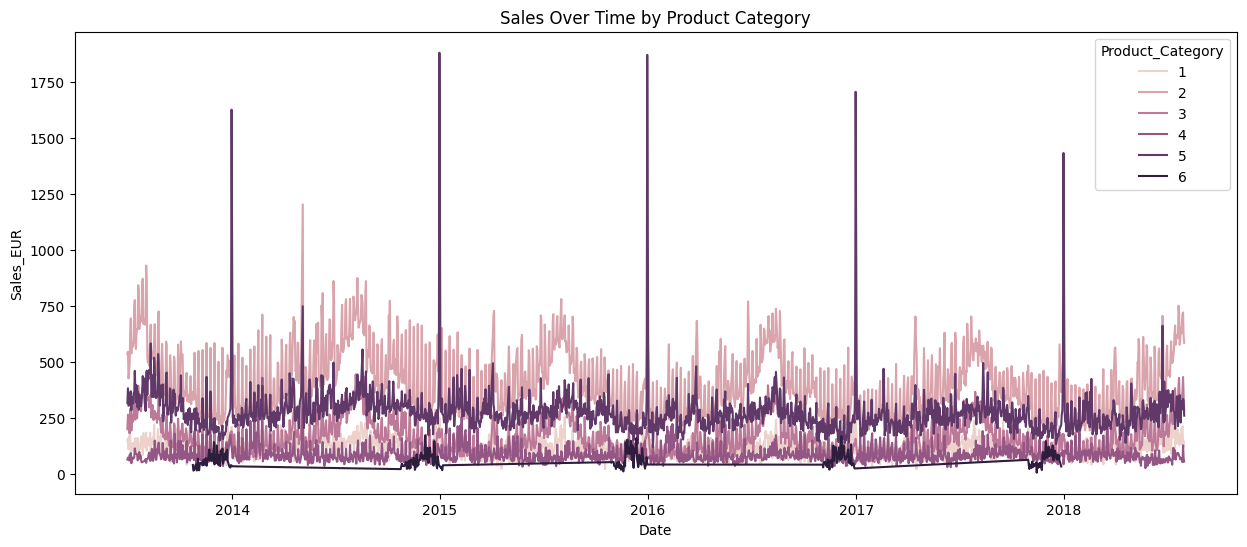

In [13]:

# Barplot doanh số theo loại sản phẩm

plt.figure(figsize=(8,6))
sns.barplot(x='Product_Category', y='Sales_EUR', data=train_data,palette='viridis')
plt.title('Sales Distribution by Product Category')
plt.show()

# Line plot doanh số theo thời gian (toàn bộ)
train_data['Date'] = pd.to_datetime(train_data['Date'])
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Sales_EUR', data=train_data)
plt.title('Sales Over Time (All Categories)')
plt.show()

# Line plot doanh số từng loại sản phẩm
plt.figure(figsize=(15,6))
sns.lineplot(x='Date', y='Sales_EUR', hue='Product_Category', data=train_data)
plt.title('Sales Over Time by Product Category')
plt.show()

In [12]:
train_data

,ID,Date,Product_Category,Sales_EUR
0,1307011,2013-07-01,1,148.828353
1,1307021,2013-07-02,1,159.793757
2,1307031,2013-07-03,1,111.885594
3,1307041,2013-07-04,1,168.864941
4,1307051,2013-07-05,1,171.280754
...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228
9330,1712226,2017-12-22,6,71.911652
9331,1712236,2017-12-23,6,84.062223
9332,1712246,2017-12-24,6,60.981969
